# K-means (clustering no supervisado)

En el aprendizaje automático no supervisado, la máquina aprende a partir de datos sin la ayuda de etiquetas o respuestas conocidas previamente. En otras palabras, la máquina no tiene una salida deseada para cada entrada de datos que recibe. En su lugar, la máquina busca patrones y estructuras en los datos por sí misma.

El objetivo del aprendizaje no supervisado es encontrar estructuras y patrones interesantes en los datos que puedan ser útiles para el análisis o la toma de decisiones. Algunas técnicas comunes de aprendizaje no supervisado incluyen el clustering (agrupamiento) y la reducción de dimensionalidad. En el clustering, la máquina agrupa automáticamente los datos similares en grupos separados. En la reducción de dimensionalidad, la máquina busca formas de reducir la cantidad de variables o características en los datos sin perder demasiada información valiosa.

https://en.wikipedia.org/wiki/K-means_clustering

https://www.unioviedo.es/compnum/labs/new/kmeans.html

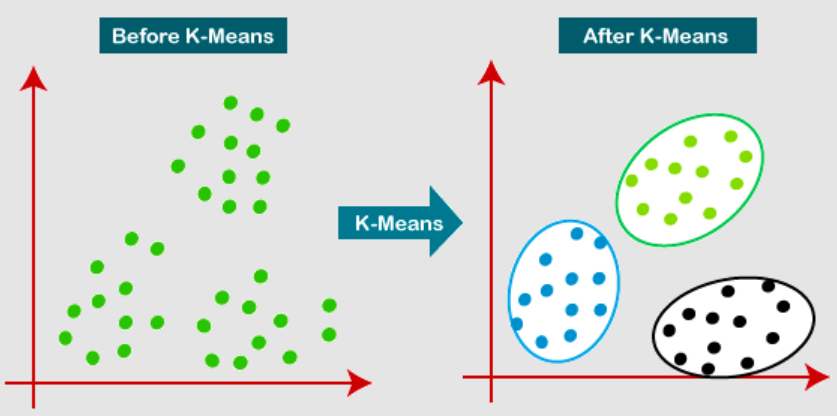

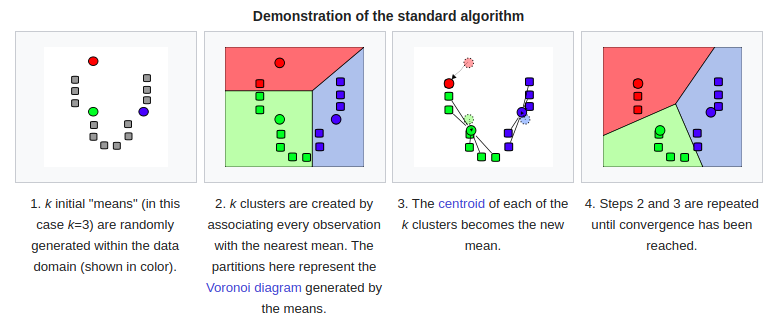

In [5]:
import pandas as pd
# Cargar datos. Vamos a utilizar el conjunto de datos de flores Iris:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# El parámetro header=None se utiliza para indicar que el conjunto de datos no tiene una fila de encabezado en el archivo CSV
# Pandas asigna nombres de columna predeterminados (0, 1, 2, etc.) a cada columna. Renombramos:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


We will refer to the rows of the matrix as samples, and the number of rows as n_samples and the the columns of the matrix as features, and the number of columns as n_features.

# Features matrix (X)

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, called the features matrix with shape [n_samples, n_features]

In [6]:
X = iris.iloc[:,:4] # no usamos la columna de clase, porque es una información que no queremos darle al modelo
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Target array (y)

In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series.

In [7]:
# Target names
y = iris["class"]
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

***

Nota: La regresión lineal se considera un método supervisado en el aprendizaje automático. En la regresión lineal, el objetivo es predecir un valor numérico continuo (la variable dependiente) en función de una o más variables predictoras (las variables independientes). El modelo se entrena utilizando un conjunto de datos etiquetados, donde la variable dependiente está presente en los datos de entrenamiento. Luego, se utiliza el modelo entrenado para hacer predicciones en nuevos datos donde la variable dependiente no está presente.

***

# Machine Learning Terminology

- Each row is an observation (also known as : sample, example, instance, record)

- Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

Las características físicas de las flores tienden a ser similares entre sus especies. Por tanto, el objetivo de k-means es detectar los tipos de flor (clase) por similitud con otras instancias de la misma especie.

No dividimos los datos en test y train, porque no hay entrenamiento ni aprendizaje. Los modelos no supervisados son algoritmos que directamente ofrecen una predicción y el paso de entrenamiento previo no va a requerir un subconjunto "train" sino todo el dataset completo. En esa fase de entrenamiento los modelos no supervisados buscan una convergencia de los parámetros internos del modelo, en el caso de k-means, esos parámetros internos son los centroides.

***

## Crear el modelo de k-means

In [66]:
# Análisis preliminar para detectar visualmente cuántos clusters podría haber
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width')
fig.update_layout(height=800)  # ajusta la altura del gráfico 3d
fig.show()

In [13]:
from sklearn.cluster import KMeans
# Creamos una instancia de la clase KMeans y especificamos el número de clústeres (k)
# que deseamos crear. Visualmente hemos detectado 2 clústeres:
kmeans = KMeans(n_clusters=3)


Ajustamos el modelo K-means a los datos utilizando el método fit() y obtenemos las etiquetas de clúster asignadas a cada muestra utilizando el método predict():

In [14]:
kmeans.fit(X) # el modelo busca los centroides mediante convergencia
y_kmeans = kmeans.predict(X) # el modelo determina el cluster correspondiente al dato según su distancia a los centroides


In [15]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

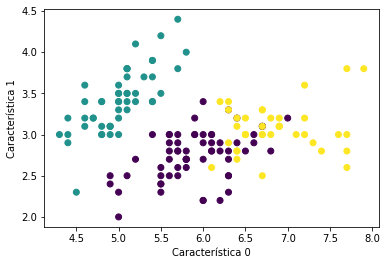

In [16]:
# Visualizamos los resultados utilizando un gráfico de dispersión.
# Por ejemplo, podemos graficar las características 0 y 1 del conjunto de datos
# y colorear cada punto según su etiqueta de clúster:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Característica 0')
plt.ylabel('Característica 1')
plt.show()

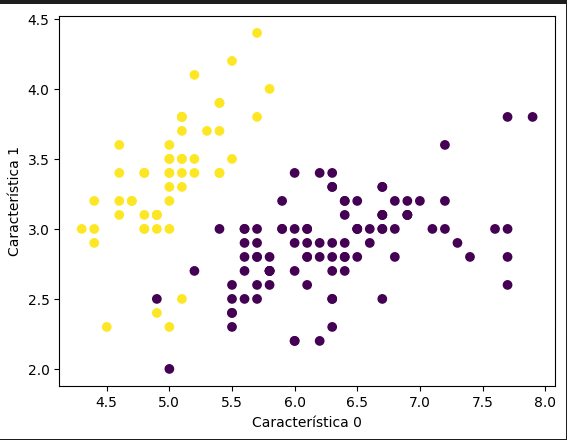

In [17]:
# Hay dos centroides que son vectores de 4 dimensiones porque hay 4 features
centroids = kmeans.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

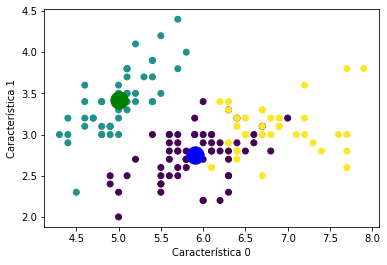

In [18]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis')

plt.scatter(centroids[0, 0], centroids[0, 1], s=300, color="blue")
plt.scatter(centroids[1, 0], centroids[1, 1], s=300, color="green")

plt.xlabel('Característica 0')
plt.ylabel('Característica 1')
plt.show()

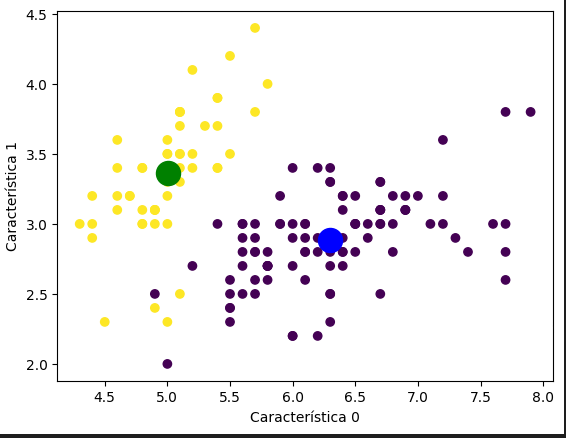

In [19]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [20]:
# Visualizamos los clusters y centroides en 3D
fig = px.scatter_3d(X, x='sepal_length', y='sepal_width', z='petal_width', color=y_kmeans, symbol=y_kmeans, opacity=0.7)

import plotly.graph_objs as go
fig.add_trace(go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 3],
                           name='centroides', mode='markers',
                           marker=dict(size=10, color='black', opacity=1)))

fig.update_layout(height=800)  # ajusta la altura del gráfico 3d
fig.show()

NameError: name 'px' is not defined

In [74]:
# Visualizamos en 3D las clases etiquetadas y los centroides de k-means con k=2
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', color=y, symbol=y, opacity=0.7)
import plotly.graph_objs as go
fig.add_trace(go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 3],
                           name='centroides', mode='markers',
                           marker=dict(size=10, color='black', opacity=1)))

fig.update_layout(height=800)  # ajusta la altura del gráfico 3d
fig.show()

***


In [ ]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
data = pd.read_csv('OnlineRetail.csv', parse_dates=['InvoiceDate'], date_parser=dateparse, encoding = 'unicode_escape')

In [79]:
# userItem = df.pivot("CustomerID", "StockCode")["Quantity"]
userItem = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum')
userItem

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Reemplazamos NaNs con ceros (0): 
userItemZero = userItem.fillna(0)

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
kmeans = KMeans(n_clusters=25)
kmeans.fit(userItemZero) # el modelo busca los centroides mediante convergencia
y_kmeans = kmeans.predict(userItemZero) # el modelo determina el cluster correspondiente al dato según su distancia a los centroides
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

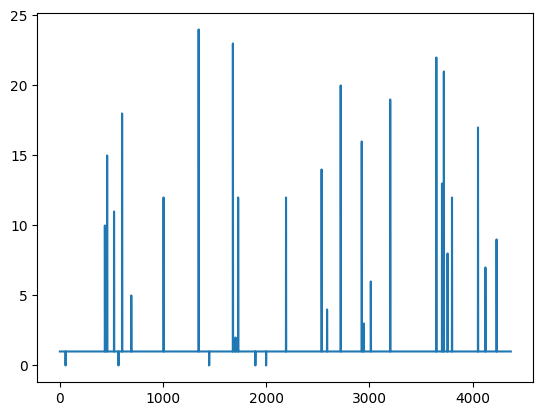

In [101]:
plt.plot(y_kmeans)
plt.show()

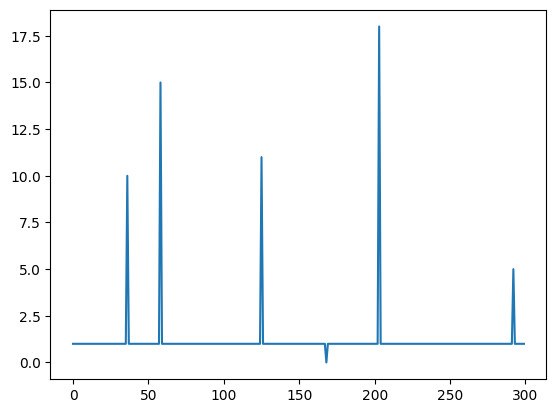

In [102]:
plt.plot(y_kmeans[400:700])
plt.show()

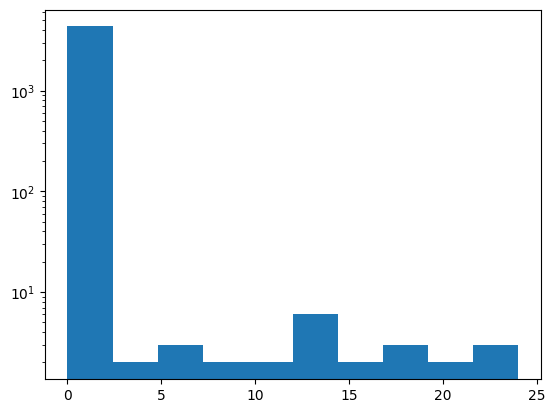

In [107]:
fig, ax = plt.subplots()
ax.hist(y_kmeans)
ax.set_yscale("log")
plt.show()